In [55]:
import  pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [56]:
np.set_printoptions(precision=4,linewidth=100)

In [57]:
ipl_auction_df = pd.read_csv('Data/IPL IMB381IPL2013.csv')

In [58]:
ipl_auction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 26 columns):
Sl.NO.           130 non-null int64
PLAYER NAME      130 non-null object
AGE              130 non-null int64
COUNTRY          130 non-null object
TEAM             130 non-null object
PLAYING ROLE     130 non-null object
T-RUNS           130 non-null int64
T-WKTS           130 non-null int64
ODI-RUNS-S       130 non-null int64
ODI-SR-B         130 non-null float64
ODI-WKTS         130 non-null int64
ODI-SR-BL        130 non-null float64
CAPTAINCY EXP    130 non-null int64
RUNS-S           130 non-null int64
HS               130 non-null int64
AVE              130 non-null float64
SR-B             130 non-null float64
SIXERS           130 non-null int64
RUNS-C           130 non-null int64
WKTS             130 non-null int64
AVE-BL           130 non-null float64
ECON             130 non-null float64
SR-BL            130 non-null float64
AUCTION YEAR     130 non-null int64
BASE PRICE   

# Encoding x features

In [59]:
X_features = ['AGE', 'COUNTRY', 'PLAYING ROLE',
'T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B',
'ODI-WKTS', 'ODI-SR-BL', 'CAPTAINCY EXP', 'RUNS-S',
'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C', 'WKTS',
'AVE-BL', 'ECON', 'SR-BL'] 



In [60]:
categorical_features ={'AGE','COUNTRY','PLAYING ROLE','CAPTAINCY EXP'}

In [61]:
ipl_auction_encoded_df = pd.get_dummies(ipl_auction_df[X_features],columns = categorical_features,drop_first=True)

In [62]:
X_features = ipl_auction_encoded_df.columns
print(X_features)

Index(['T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C', 'WKTS', 'AVE-BL',
       'ECON', 'SR-BL', 'AGE_2', 'AGE_3', 'CAPTAINCY EXP_1', 'COUNTRY_BAN',
       'COUNTRY_ENG', 'COUNTRY_IND', 'COUNTRY_NZ', 'COUNTRY_PAK', 'COUNTRY_SA',
       'COUNTRY_SL', 'COUNTRY_WI', 'COUNTRY_ZIM', 'PLAYING ROLE_Batsman',
       'PLAYING ROLE_Bowler', 'PLAYING ROLE_W. Keeper'],
      dtype='object')


# lets split the data

In [63]:
X = sm.add_constant(ipl_auction_encoded_df)

In [64]:
Y = ipl_auction_df['SOLD PRICE']

In [65]:
train_X,test_X,train_Y,test_Y = train_test_split(X,Y,train_size =0.8,random_state=50)

# fitting the model

In [66]:
ipl_model = sm.OLS(train_Y,train_X).fit()

In [67]:
ipl_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
========================================================================================
Model:                     OLS                     Adj. R-squared:            0.447     
Dependent Variable:        SOLD PRICE              AIC:                       2958.9833 
Date:                      2020-09-05 21:31        BIC:                       3043.6038 
No. Observations:          104                     Log-Likelihood:            -1447.5   
Df Model:                  31                      F-statistic:               3.682     
Df Residuals:              72                      Prob (F-statistic):        2.68e-06  
R-squared:                 0.613                   Scale:                     1.0385e+11
----------------------------------------------------------------------------------------
                          Coef.       Std.Err.     t    P>|t|     [0.025       0.975]   
----------------------------------------------------------------------------------------
const                   208160.9909 226783.0636  0.9179 0.3617 -243922.7839  660244.7656
T-RUNS                     -45.4548     28.6831 -1.5847 0.1174    -102.6335      11.7238
T-WKTS                      72.2181    577.4629  0.1251 0.9008   -1078.9332    1223.3694
ODI-RUNS-S                  63.2699     28.2665  2.2383 0.0283       6.9216     119.6182
ODI-SR-B                  -373.3406   1585.2318 -0.2355 0.8145   -3533.4424    2786.7613
ODI-WKTS                   454.2875    820.3922  0.5537 0.5815   -1181.1345    2089.7096
ODI-SR-BL                -2188.6673   1755.6726 -1.2466 0.2166   -5688.5367    1311.2021
RUNS-S                      79.7563    154.3170  0.5168 0.6069    -227.8690     387.3816
HS                       -1415.2475   2541.0315 -0.5570 0.5793   -6480.7013    3650.2062
AVE                       8201.2890   7592.7226  1.0802 0.2837   -6934.5268   23337.1048
SR-B                     -1162.1250   1316.0923 -0.8830 0.3802   -3785.7070    1461.4570
SIXERS                    2169.7328   3176.4947  0.6831 0.4968   -4162.4936    8501.9593
RUNS-C                      82.6112    287.4622  0.2874 0.7746    -490.4344     655.6567
WKTS                      2470.7284   7147.7319  0.3457 0.7306  -11778.0147   16719.4715
AVE-BL                    3186.9655  11214.0173  0.2842 0.7771  -19167.7694   25541.7004
ECON                      3628.8034  12890.4119  0.2815 0.7791  -22067.7632   29325.3700
SR-BL                     2277.4795  16832.6149  0.1353 0.8928  -31277.7250   35832.6840
AGE_2                  -185148.2832 119372.8704 -1.5510 0.1253 -423113.7511   52817.1847
AGE_3                  -144211.0292 158809.2171 -0.9081 0.3669 -460791.4175  172369.3591
CAPTAINCY EXP_1         185040.1467 121729.3142  1.5201 0.1329  -57622.8061  427703.0994
COUNTRY_BAN             -10332.7069 429228.2832 -0.0241 0.9809 -865983.6510  845318.2373
COUNTRY_ENG             667688.4997 235980.7275  2.8294 0.0060  197269.5170 1138107.4824
COUNTRY_IND             213176.5488 121241.6752  1.7583 0.0829  -28514.3134  454867.4109
COUNTRY_NZ               53451.8208 178464.6945  0.2995 0.7654 -302311.0455  409214.6871
COUNTRY_PAK             121578.0917 179698.4195  0.6766 0.5008 -236644.1604  479800.3439
COUNTRY_SA              -38362.9059 129603.1455 -0.2960 0.7681 -296722.0546  219996.2428
COUNTRY_SL               26678.0160 170466.9424  0.1565 0.8761 -313141.6229  366497.6549
COUNTRY_WI             -160558.6187 174534.8796 -0.9199 0.3607 -508487.5423  187370.3049
COUNTRY_ZIM            -147114.5932 383246.1496 -0.3839 0.7022 -911101.8294  616872.6429
PLAYING ROLE_Batsman    212628.8988 147579.5474  1.4408 0.1540  -81565.5519  506823.3496
PLAYING ROLE_Bowler     -25923.3259 121692.4342 -0.2130 0.8319 -268512.7598  216666.1080
PLAYING ROLE_W. Keeper  108430.9416 224924.9226  0.4821 0.6312 -339948.6968  556810.5799
----------------------------------------------------------------

# variace inflation factor (VIF) to check multi-collinaerity

In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [69]:
def get_vif_factors(X):
    X_matrix = X.values
    vif = [variance_inflation_factor(X_matrix,i) for i in range(X_matrix.shape[1])]
    vif_factors = pd.DataFrame()
    vif_factors['column']= X.columns
    vif_factors['VIF']=vif
    return vif_factors
    

In [70]:
vif_factors = get_vif_factors(X[X_features])
vif_factors

,column,VIF
0,T-RUNS,12.612694
1,T-WKTS,7.679284
2,ODI-RUNS-S,16.426209
3,ODI-SR-B,13.829376
4,ODI-WKTS,9.951800
5,ODI-SR-BL,4.426818
6,RUNS-S,16.135407
7,HS,22.781017
8,AVE,25.226566
9,SR-B,21.576204


In [71]:
columns_with_large_vif = vif_factors[vif_factors['VIF']>4].column

In [72]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(12,10))

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

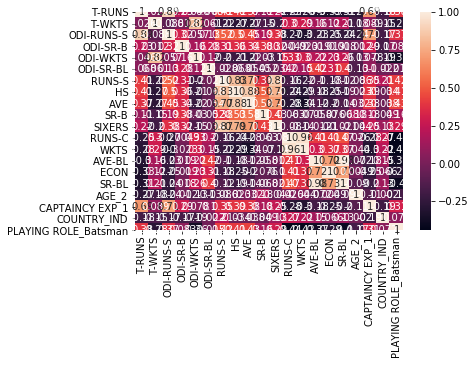

In [73]:
sn.heatmap(X[columns_with_large_vif].corr(),annot =True);

In [74]:
columns_to_be_removed = ['T-RUNS', 'T-WKTS', 'RUNS-S', 'HS',
'AVE', 'RUNS-C', 'SR-B', 'AVE-BL',
'ECON', 'ODI-SR-B', 'ODI-RUNS-S', 'AGE_2', 'SR-BL'] 

In [75]:
X_new_features = list(set(X_features)-set(columns_to_be_removed))

In [76]:
get_vif_factors(X[X_new_features])

,column,VIF
0,SIXERS,2.397409
1,COUNTRY_ZIM,1.205305
2,ODI-WKTS,2.742889
3,COUNTRY_IND,3.144668
4,COUNTRY_SL,1.519752
5,ODI-SR-BL,2.822148
6,AGE_3,1.779861
7,COUNTRY_NZ,1.173418
8,COUNTRY_ENG,1.131869
9,COUNTRY_SA,1.416657


In [77]:
train_X = train_X[X_new_features]

In [78]:
ipl_model_2 = sm.OLS(train_Y,train_X).fit()

In [79]:
ipl_model_2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
========================================================================================
Model:                      OLS                Adj. R-squared (uncentered):   0.767     
Dependent Variable:         SOLD PRICE         AIC:                           2954.9049 
Date:                       2020-09-05 21:31   BIC:                           3002.5040 
No. Observations:           104                Log-Likelihood:                -1459.5   
Df Model:                   18                 F-statistic:                   19.97     
Df Residuals:               86                 Prob (F-statistic):            2.30e-23  
R-squared (uncentered):     0.807              Scale:                         1.0943e+11
----------------------------------------------------------------------------------------
                          Coef.       Std.Err.     t    P>|t|     [0.025       0.975]   
----------------------------------------------------------------------------------------
SIXERS                    7278.6649   1610.7971  4.5187 0.0000    4076.5063   10480.8235
COUNTRY_ZIM            -119370.0841 370536.2265 -0.3222 0.7481 -855971.7233  617231.5551
ODI-WKTS                   633.1869    461.7011  1.3714 0.1738    -284.6445    1551.0183
COUNTRY_IND             328599.6861  94081.9470  3.4927 0.0008  141570.9656  515628.4066
COUNTRY_SL              127487.4157 140947.2684  0.9045 0.3683 -152706.4804  407681.3118
ODI-SR-BL                  721.9462   1266.0013  0.5703 0.5700   -1794.7811    3238.6735
AGE_3                    57694.5210  91087.3668  0.6334 0.5282 -123381.1711  238770.2131
COUNTRY_NZ               80491.5718 164301.3717  0.4899 0.6255 -246128.7451  407111.8887
COUNTRY_ENG             691849.2334 206815.9831  3.3452 0.0012  280712.6662 1102985.8006
COUNTRY_SA               45446.8971 107407.7173  0.4231 0.6733 -168072.5781  258966.3722
PLAYING ROLE_Bowler     -26752.5547 100847.5104 -0.2653 0.7914 -227230.7703  173725.6609
COUNTRY_BAN             -67532.1946 353670.9571 -0.1909 0.8490 -770606.7878  635542.3987
PLAYING ROLE_W. Keeper  -19975.4918 153122.7971 -0.1305 0.8965 -324373.5378  284422.5542
CAPTAINCY EXP_1         232757.4631  91173.7670  2.5529 0.0124   51510.0129  414004.9133
COUNTRY_PAK             140054.9991 151847.3509  0.9223 0.3589 -161807.5440  441917.5421
PLAYING ROLE_Batsman    128591.0072  95600.7378  1.3451 0.1821  -61456.9696  318638.9840
WKTS                      2130.6917   2021.1105  1.0542 0.2947   -1887.1430    6148.5264
COUNTRY_WI             -182331.8963 150889.6915 -1.2084 0.2302 -482290.6754  117626.8828
----------------------------------------------------------------------------------------
Omnibus:                       8.041               Durbin-Watson:                  1.753
Prob(Omnibus):                 0.018               Jarque-Bera (JB):               7.642
Skew:                          0.607               Prob(JB):                       0.022
Kurtosis:                      3.537               Condition No.:                  1510 
========================================================================================
* The condition number is large (2e+03). This might indicate             strong
multicollinearity or other numerical problems.
"""